# <center> Введение в визуализацию данных на Python </center>

<div>
<img src="https://s3.tproger.ru/uploads/2019/01/python-plotly.jpg" width="900"/>
</div>

# План вебинара

- Визуализация
- Типы переменных и основные графики
- Библиотека matplotlib
- Библиотека seaborn

---

### Визуализация

Визуализация - важная часть в анализе данных<br>

Разведочный анализ данных (англ. exploratory data analysis, <b>EDA</b>) — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации. <br>

<b>Цели EDA:</b>

<li>максимальное «проникновение» в данные</li>
<li>выявление основных структур</li>
<li>выбор наиболее важных переменных</li>
<li>обнаружение отклонений и аномалий</li>
<li>проверка основных гипотез</li>
<li>разработка начальных моделей</li> <br>

 Визуализация данных помогает представить большие и сложные наборы данных в простом и наглядном виде. <br>На этапе окончания проекта важно суметь отчитаться о его результатах так, чтобы даже непрофессионалам, не обладающим техническими знаниями, всё стало ясно и понятно.

### Про типа переменных

Типы данных являются важным понятием статистики, которое необходимо понимать, чтобы правильно применять статистические измерения к вашим данным и, следовательно, правильно сделать определенные предположения о них. <br>
Вам также необходимо знать, с каким типом данных вы имеете дело, чтобы выбрать правильный метод визуализации.

<br>
<br>
<br>

<div>
    <img src="./variable_types.png" width="600"/>
</div>

Почему типы данных важны? <br>
Типы данных являются важной концепцией, потому что статистические методы могут использоваться только с определенными типами данных. Вы должны анализировать непрерывные данные иначе, чем категориальные данные, иначе это приведет к неправильному анализу. Поэтому, зная типы данных, с которыми вы имеете дело, вы сможете выбрать правильный метод анализа.

### Виды графиков
- plot (график)
- hist (гистограмма)
- bar-chart (столбчатая диаграмма)
- pie-chart (круговая диаграмма) // заметка на полях, при большом количестве категорий работает плохо
- scatter-plot (диаграмма рассеяния)
- heat-map (тепловая диаграмма)

---

### Быстрый старт в matplotlib

In [4]:
# Импорт библиотек
import matplotlib.pyplot as plt 
import numpy as np # для работы с массивами

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # для векторного отображения графиков

<b>Базовые элементы matplotlib</b>

<br>

<div>
    <img src="./fig_and_axes.png" width="400"/>
</div>

<b>Figure</b> - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.

<br>
<b>Axes</b> - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

[None]

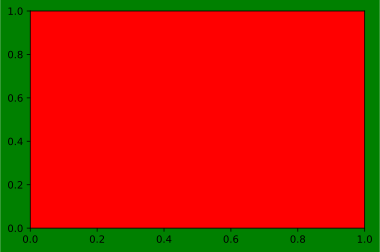

In [6]:
# Создадим объекты Figure и Axes(subplot)
fig = plt.figure()
ax = fig.add_subplot()

fig.set(facecolor="green")
ax.set(facecolor = "red")

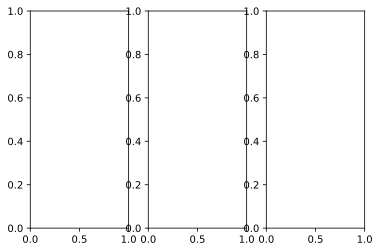

In [7]:
# Для наглядности создадим создадим Figure с 3-мя Axes
fig, axes = plt.subplots(1, 3)

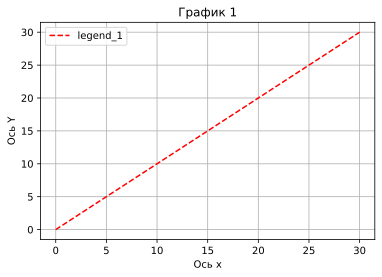

In [14]:
# Построим линейный график

fig = plt.figure()
ax = fig.add_subplot()

x = np.linspace(0, 30, 10)
y = x

ax.plot(x, y, color="red", linestyle="--", label="legend_1")
ax.legend()
ax.grid()
ax.set(title="График 1", xlabel="Ось x", ylabel="Ось Y");

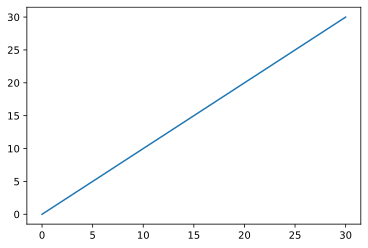

In [15]:
# Строим линейный график без явного создания объектов Figure и Axes
plt.plot(x, y)

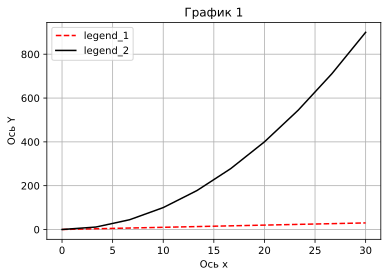

In [16]:
# Построим несколько графиков

fig = plt.figure()
ax = fig.add_subplot()

x = np.linspace(0, 30, 10)
y1 = x
y2 = [i**2 for i in x]

ax.plot(x, y1, color="red", linestyle="--", label="legend_1")
ax.plot(x, y2, color="black", linestyle="-", label="legend_2")

ax.legend()
ax.grid()
ax.set(title="График 1", xlabel="Ось x", ylabel="Ось Y");

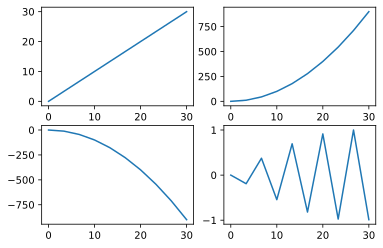

In [23]:
## Построение несколько графиков отдельно друг от друга (на разных полях)
fig, axes = plt.subplots(2, 2)

x = np.linspace(0, 30, 10)
y1 = x
y2 = [i**2 for i in x]
y3 = [-i**2 for i in x]
y4 = [np.sin(i) for i in x]

# axes[0, 0].plot(x, y1)
# axes[0, 1].plot(x, y2)
# axes[1, 0].plot(x, y3)
# axes[1, 1].plot(x, y4)

for ax, y in zip(axes.flatten(), [y1, y2, y3, y4]):
    ax.plot(x, y)

In [18]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [21]:
axes.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

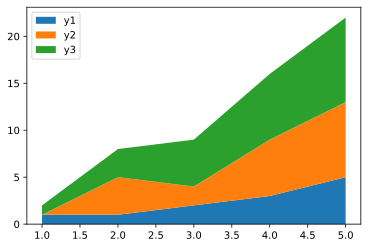

In [24]:
## стековый график
"""
Для построения стекового графика используется функция stackplot(). 
Суть его в том, что графики отображаются друг над другом, и каждый следующий является суммой предыдущего и заданного:
"""
x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

fig, ax = plt.subplots()

ax.stackplot(x, y1, y2, y3, labels=['y1', 'y2', 'y3']) 
ax.legend(loc='upper left');

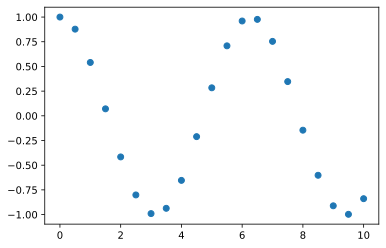

In [25]:
# точечный график

fig, ax = plt.subplots()

x = np.arange(0, 10.5, 0.5) 
y = np.cos(x) 
ax.scatter(x, y)

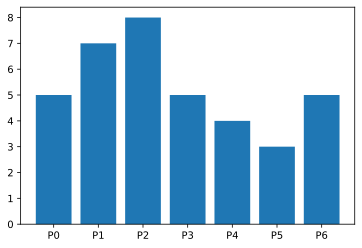

In [29]:
# Столбчатые диаграммы
"""
Для визуализации категориальных данных хорошо подходят столбчатые диаграммы. Для их построения используются функции:
bar() — вертикальная столбчатая диаграмма;
barh() — горизонтальная столбчатая диаграмма;
"""
fig, ax = plt.subplots()

labels = [f'P{i}' for i in range(7)]

x = np.arange(len(labels))
counts = np.random.randint(3, 10, len(labels)) 

ax.bar(x, counts);
ax.set_xticks(x)
ax.set_xticklabels(labels);

In [27]:
x

array([0, 1, 2, 3, 4, 5, 6])

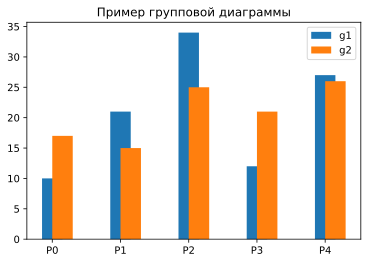

In [32]:
# Групповые столбчатые диаграмма
#Используя определенным образом подготовленные данные, можно строить групповые диаграммы:

labels = [f'P{i}' for i in range(5)] 
g1 = [10, 21, 34, 12, 27]
g2 = [17, 15, 25, 21, 26]
width = 0.3
x = np.arange(len(labels))

fig, ax = plt.subplots()

ax.bar(x , g1, width, label='g1') 
ax.bar(x + width/2, g2, width, label='g2') 

ax.set(title="Пример групповой диаграммы", xticks=x, xticklabels=labels)
ax.legend();

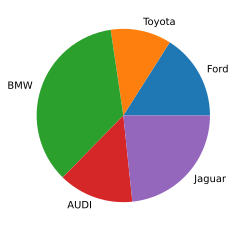

In [33]:
# Круговые диаграммы 
"""
Это наглядный способ показать доли компонентов в наборе. 
Они идеально подходят для отчётов, презентаций и т.п.
Для построения круговых диаграмм в Matplotlib используется функция pie().
"""
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMW', 'AUDI', 'Jaguar'] 
fig, ax = plt.subplots()

ax.pie(vals, labels=labels);

---

### Быстрый старт в seaborn

In [34]:
import seaborn as sns

In [35]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [36]:
# Загрузим датасет по автомобилям
mpg = sns.load_dataset("mpg")

In [38]:
type(mpg)

pandas.core.frame.DataFrame

In [37]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


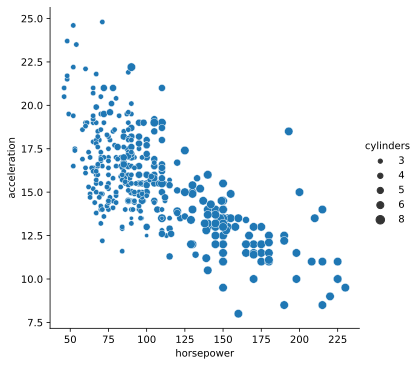

In [39]:
"""
Построим зависимость ускорения (acceleration) от количества лошадиных сил (horsepower), 
при этом размер точки будет определяться количеством цилиндров
"""

sns.relplot(x="horsepower", y="acceleration", size="cylinders", kind="scatter", data=mpg);

In [40]:
"""
Для демонстрации работы функции построения линейного графика загрузим набор данных flights, 
содержащий информацию о количестве пассажиров, которые воспользовались авиатранспортом:
"""
flights = sns.load_dataset("flights") 
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


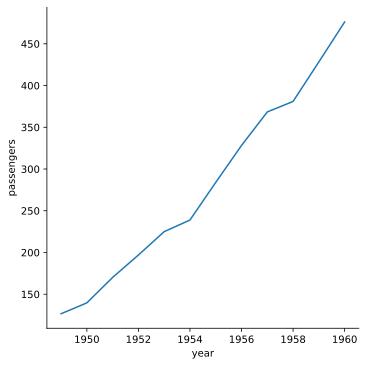

In [43]:
sns.relplot(x="year", y="passengers", kind="line", data=flights, ci=None);

In [44]:
iris = sns.load_dataset("iris") 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


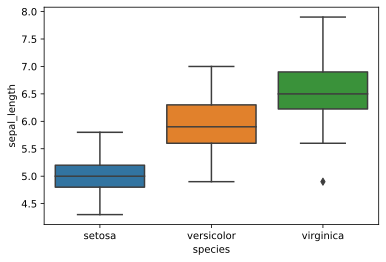

In [45]:
"""
Загруженный набор данных является эталонным для изучения алгоритмов классификации, 
он представляет собой информацию о 150 экземплярах ириса по 50 на каждый отдельный вид: 
Ирис щетинистый (setosa), Ирис Виргинский (virginica) и Ирис разноцветный (versicolor).
Для каждого экземпляра определены следующие параметры:
• Длина наружной доли околоцветника (sepal_length);
• Ширина наружной доли околоцветника (sepal_width); 
• Длина внутренней доли околоцветника (petal_length); 
• Ширина внутренней доли околоцветника (petal_width).


"""

sns.boxplot(x="species", y="sepal_length", data=iris);

Заключение:

Визуализация данных не только помогает вам лучше анализировать ваши данные, но всякий раз, когда вы обнаруживаете какие-либо идеи, вы можете использовать эти методы, чтобы поделиться своими результатами с другими людьми в простой и интуитивно понятной форме